<a href="https://colab.research.google.com/github/erickfernandesgon/Ipca_variation_code/blob/main/ipca_variation_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sidrapy
import numpy as np
import pandas as pd
import sidrapy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
ipca_data  = sidrapy.get_table(table_code = "7060", territorial_level = str(7), ibge_territorial_code = "all",  period = "all", classification="315/7479")
ipca_brasil =  sidrapy.get_table(table_code = "7060", territorial_level = str(1), ibge_territorial_code = "all",  period = "all", classification="315/7479")

In [ ]:
def changing_column(data_frame_change):
  data_frame_change.rename(columns=data_frame_change.iloc[0], inplace = True)
  return

In [ ]:
#Activate functions to change the header of the dataframe to Brasil and Territorial Level
changing_column(ipca_data)
changing_column(ipca_brasil)


In [ ]:
#Dropping the first row from both dataframes
ipca_data.drop(labels=[0], inplace = True)
ipca_brasil.drop(labels=[0], inplace=True)

In [ ]:
def drop_labels(dataframe_to_drop):
  dataframe_to_drop.drop(labels=['Unidade de Medida (Código)', 'Nível Territorial', 'Nível Territorial (Código)', 'Variável (Código)','Unidade de Medida', 'Unidade de Medida (Código)', 'Mês', 'Geral, grupo, subgrupo, item e subitem (Código)',	'Geral, grupo, subgrupo, item e subitem'], axis = 1, inplace = True)
  return

In [ ]:
drop_labels(ipca_data)
drop_labels(ipca_brasil)

In [ ]:
ipca_data_mensal = ipca_data.loc[ipca_data['Variável'] == 'IPCA - Variação mensal']
ipca_brasil = ipca_brasil.loc[ipca_data['Variável'] == 'IPCA - Variação mensal']

In [ ]:
ipca_belohorizonte, ipca_belem, ipca_curitiba,  ipca_fortaleza, ipca_espirito_santo, ipca_portoalegre, ipca_recife, ipca_rio, ipca_salvador, ipca_sao_paulo = ipca_data_mensal.copy(),ipca_data_mensal.copy(), ipca_data_mensal.copy(), ipca_data_mensal.copy(), ipca_data_mensal.copy(), ipca_data_mensal.copy(), ipca_data_mensal.copy(), ipca_data_mensal.copy(), ipca_data_mensal.copy(), ipca_data_mensal.copy()

In [ ]:
list_cities = [ipca_belohorizonte, ipca_belem, ipca_curitiba, ipca_fortaleza, ipca_espirito_santo, ipca_portoalegre, ipca_recife, ipca_rio, ipca_salvador, ipca_sao_paulo, ipca_brasil]

In [ ]:
count_cities = ipca_data_mensal.groupby("Região Metropolitana")["Variável"].count()
data_frame_reset = count_cities.reset_index()

In [ ]:
total = 0
new = 0
nomes_cidades = ['Região Metropolitana']
for i in range(10):
  nomes_cidades.append(str(data_frame_reset.iloc[total,0]))
  total = 1 + i
  list_cities[new].rename(columns={nomes_cidades[0]:nomes_cidades[new+1]}, inplace=True)
  new = new + 1
  list_cities[i]['Mês'] = pd.to_datetime(list_cities[i]['Mês (Código)'], format='%Y%m').dt.strftime("%d-%b-%Y")
  list_cities[i]['Mês'] = pd.to_datetime(list_cities[i]['Mês'], format='%d-%b-%Y').dt.strftime("%b-%Y")
  list_cities[i] = list_cities[i][list_cities[i].iloc[:,2] == str(data_frame_reset.iloc[i,0])]

In [ ]:
list_cities[-1]['Mês'] = pd.to_datetime(list_cities[-1]['Mês (Código)'], format='%Y%m').dt.strftime("%d-%b-%Y")
list_cities[-1]['Mês'] = pd.to_datetime(list_cities[-1]['Mês'], format='%d-%b-%Y').dt.strftime("%b-%Y")


In [ ]:
titles = ['Belo Horizonte(MG)', 'Belém(PA)', 'Curitiba(PR)', 'Fortaleza(CE)','Grande Vitória(ES)', 'Porto Alegre(RS)', 'Recife(PE)', 'Rio de Janeiro(RJ)', 'Salvador(BA)', 'São Paulo(SP)']
for i in range(10):
  list_cities[i].iloc[:,0] = list_cities[i].iloc[:,0].astype(float)
  list_cities[i].drop(labels= ['Mês (Código)'], axis = 1, inplace=True)
  list_cities[i].rename(columns = {'Valor': titles[i]}, inplace = True)
  list_cities[i].drop(columns = {'Região Metropolitana (Código)'}, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

In [ ]:
def normalizing_countries(dataframe_used):
  dataframe_used.iloc[:,0] = dataframe_used.iloc[:,0].astype(float)
  dataframe_used.drop(labels= ['Mês (Código)'], axis = 1, inplace=True)
  dataframe_used.rename(columns = {'Valor': 'Brasil-'}, inplace = True)
  list_cities[-1].drop(columns = {'Brasil'}, inplace = True)
  return

In [ ]:
ipca_bh, ipca_be, ipca_ctba, ipca_for, ipca_vit, ipca_poa, ipca_rec, ipca_rj, ipca_salvador_bahia, ipca_sampa, ipca_br  = list_cities[0], list_cities[1], list_cities[2], list_cities[3], list_cities[4], list_cities[5],list_cities[6], list_cities[7], list_cities[8], list_cities[9], list_cities[10]

In [ ]:
normalizing_countries(ipca_br)

In [ ]:
list_dataframes = [ipca_bh, ipca_be, ipca_ctba, ipca_for, ipca_vit, ipca_poa, ipca_rec, ipca_rj, ipca_salvador_bahia, ipca_sampa, ipca_br]

In [ ]:
#Loop for Drop Cities or Countries column and Variable(Type) 
for i in range(11):
  list_dataframes[i].drop(list_dataframes[i].iloc[:, 1:3], inplace=True, axis=1)

In [ ]:
new_df = ipca_rec.merge(ipca_bh, on='Mês').merge(ipca_be, on='Mês').merge(ipca_ctba, on='Mês').merge(ipca_poa, on='Mês').merge(ipca_for, on='Mês').merge(ipca_rj, on='Mês').merge(ipca_vit, on='Mês').merge(ipca_br, on='Mês').merge(ipca_salvador_bahia, on='Mês').merge(ipca_sampa, on='Mês')

In [ ]:
new_df = new_df.iloc[:, [1,0,2,3,4,5,6,7,8,9,10,11]]

In [ ]:
ipca_month_2022 = new_df[new_df['Mês'].str.contains('Jul-2022', case=False, na=False)]

In [ ]:
ipca_month_2022.head()

,Mês,Recife(PE),Belo Horizonte(MG),Belém(PA),Curitiba(PR),Porto Alegre(RS),Fortaleza(CE),Rio de Janeiro(RJ),Grande Vitória(ES),Brasil-,Salvador(BA),São Paulo(SP)
30,Jul-2022,-3.88,-7.28,-4.87,-8.22,-10.86,-4.55,-0.26,-12.28,-4.26,-6.09,0.06


In [ ]:
ipca_fuel_percentage = []
for i in range(1, 12):
  ipca_fuel_percentage.append(ipca_month_2022.iloc[0,i])
Grande Vitória -12,28%, Porto Alegre -10.86%, Curitiba -8.22%, Belo Horizonte-7.28%, Salvador-6.09%, Belém-4.87%, Recife -3.88%, Rio de Janeiro-0.25%, São Paulo 0.06%

In [ ]:
ipca_fuel_cities = list(ipca_month_2022.columns)
ipca_fuel_cities = tuple(ipca_fuel_cities[1:])

Text(0.5, 1.0, ' Variação percentual do IPCA dos Combustíveis em Grandes Metrópoles(Julho de 2022)')

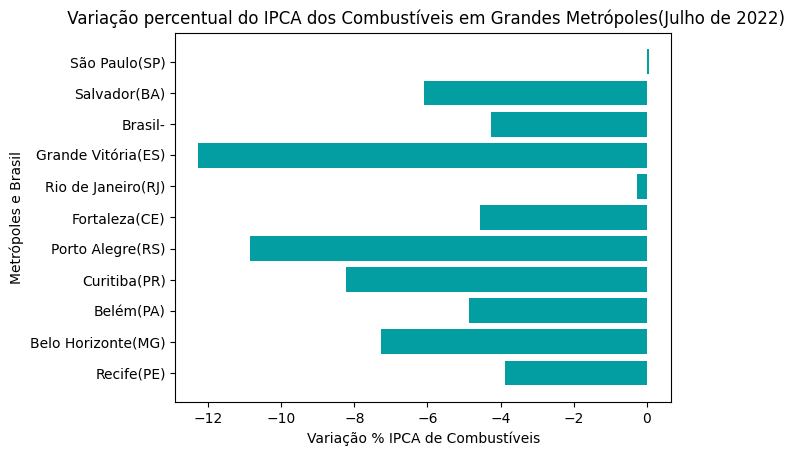

In [ ]:
plt.barh(ipca_fuel_cities, ipca_fuel_percentage, color ='#029ea2')
plt.ylabel('Metrópoles e Brasil')
plt.xlabel('Variação % IPCA de Combustíveis')
plt.title(' Variação percentual do IPCA dos Combustíveis em Grandes Metrópoles(Julho de 2022)')